https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-employee-attrition-rate/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('dataset/Train.csv')

In [4]:
data.shape

(7000, 24)

In [5]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


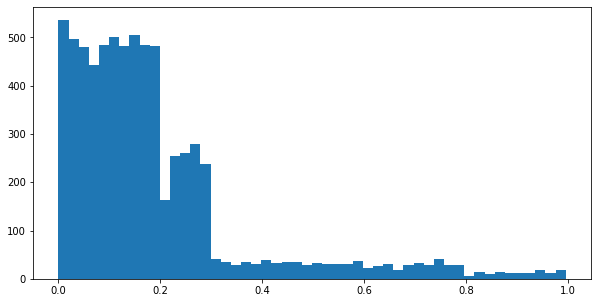

In [6]:
plt.figure(figsize = (10, 5))
plot = plt.hist(data.Attrition_rate, bins = 50)

In [7]:
data = data.fillna(data.mean())
data.shape

(7000, 24)

In [8]:
data[data.Attrition_rate ==data.Attrition_rate.max()]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
3422,EID_21804,F,47.0,4,Single,Lebanon,Logistics,Behavioral,15.0,1,65,1,3,6.0,type2,2.0,3,-1.8176,0.7075,2.0,1,6,4,0.9959


In [9]:
data = data.drop(columns = ['Employee_ID'])

In [10]:
!pip install feature-engine

In [11]:
X = data.drop('Attrition_rate', axis = 1)
y = data.Attrition_rate.values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, random_state=0)

In [13]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [14]:
ohe = OneHotCategoricalEncoder(drop_last=True)
X_train = ohe.fit_transform(X_train).values
X_test = ohe.transform(X_test).values

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression();
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 476.75554264785
